# Imports

In [2]:
import numpy as np                         # Numerical python
import pandas as pd                        # Panel data / Excel for python\
import tensorflow as tf                    # Deep Learning Library
import librosa                             # Audio Analysis Package             
import keras                               # Tensorflow API
import matplotlib.pyplot as plt            # Mathematical plotting library

from pydub import AudioSegment             # Import the AudioSegment class for processing audio and the 
from pydub.silence import split_on_silence # split_on_silence function for separating out silent chunks.

import os

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import rmsprop
from keras.models import load_model

from sklearn.model_selection import train_test_split
from scipy.stats import mode

Using TensorFlow backend.
C:\Users\admin\Anaconda3\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


## Preprocessing

In [3]:
def get_mfcc(x_wav, num_features = 100):
    y, sr = librosa.load(x_wav)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_features).T,axis=0)
    return mfccs

In [ ]:
Emotions = ['Anger','Fear','Surprised','Sad','Happy','Disgust','Neutral']

X = []
y = []

print("Processing Audio Files...")
print("Extracting Files")
for i in range(len(Emotions)):
    for filename in os.listdir('Wav1' + '/' + Emotions[i]):
        if filename.endswith('.wav'):
            m = get_mfcc('Wav1' + '/' + Emotions[i] + '/' + filename, num_features = 100)
            X.append(m)
            y.append(i)
    print('Processing for {} Completed'.format(Emotions[i]))

In [7]:
np.savetxt('Array_data.txt',X, fmt='%f')
np.savetxt('Array_labels.txt',y, fmt='%f')

## ----------------------------------------------------------------------------------------------------

## Import Data

In [6]:
X = np.loadtxt('Array_data.txt', dtype=float)
y = np.loadtxt('Array_labels.txt', dtype=float)

X = np.array(X)  
y = np.array(y) 

labels_categorical = to_categorical(y)

In [47]:
X = np.array(X)  
y = np.array(y) 
labels_categorical = to_categorical(y)

## Model

In [7]:
from Z11 import Models

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, labels_categorical, test_size=0.15, random_state=42,shuffle = True)

In [9]:
model = Models.CNN_Improved(num_features= 100)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 100, 32)           192       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 32)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 12, 32)            5152      
_________________________________________________________________
activation_2 (Activation)    (None, 12, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 12, 32)            5152      
_________________________________________________________________
activation_3 (Activation)    (None, 12, 32)          

In [11]:
model.fit(X_train,y_train,X_test,y_test, num_epochs=260)

Train on 8692 samples, validate on 1534 samples
Epoch 1/260
8692/8692 [==============================] - 2s 207us/step - loss: 1.3080 - accuracy: 0.5211 - val_loss: 1.1832 - val_accuracy: 0.5945
Epoch 2/260
8692/8692 [==============================] - 2s 204us/step - loss: 1.2270 - accuracy: 0.5509 - val_loss: 1.1380 - val_accuracy: 0.5795
Epoch 3/260
8692/8692 [==============================] - 2s 204us/step - loss: 1.1773 - accuracy: 0.5678 - val_loss: 1.0782 - val_accuracy: 0.6115
Epoch 4/260
8692/8692 [==============================] - 2s 203us/step - loss: 1.1418 - accuracy: 0.5843 - val_loss: 1.1298 - val_accuracy: 0.5789
Epoch 5/260
8692/8692 [==============================] - 2s 200us/step - loss: 1.1039 - accuracy: 0.5933 - val_loss: 1.0099 - val_accuracy: 0.6271
Epoch 6/260
8692/8692 [==============================] - 2s 209us/step - loss: 1.0789 - accuracy: 0.6096 - val_loss: 1.0231 - val_accuracy: 0.6349
Epoch 7/260
8692/8692 [==============================] - 2s 208us/step

Epoch 56/260
8692/8692 [==============================] - 2s 212us/step - loss: 0.6762 - accuracy: 0.7549 - val_loss: 0.7553 - val_accuracy: 0.7184
Epoch 57/260
8692/8692 [==============================] - 2s 219us/step - loss: 0.6691 - accuracy: 0.7577 - val_loss: 0.7704 - val_accuracy: 0.7223
Epoch 58/260
8692/8692 [==============================] - 2s 209us/step - loss: 0.6792 - accuracy: 0.7536 - val_loss: 0.7517 - val_accuracy: 0.7275
Epoch 59/260
8692/8692 [==============================] - 2s 210us/step - loss: 0.6737 - accuracy: 0.7559 - val_loss: 0.7809 - val_accuracy: 0.7301
Epoch 60/260
8692/8692 [==============================] - 2s 212us/step - loss: 0.6744 - accuracy: 0.7528 - val_loss: 0.7499 - val_accuracy: 0.7379
Epoch 61/260
8692/8692 [==============================] - 2s 216us/step - loss: 0.6666 - accuracy: 0.7584 - val_loss: 0.7617 - val_accuracy: 0.7236
Epoch 62/260
8692/8692 [==============================] - 2s 213us/step - loss: 0.6735 - accuracy: 0.7547 - val_

8692/8692 [==============================] - 2s 213us/step - loss: 0.5521 - accuracy: 0.8007 - val_loss: 0.7340 - val_accuracy: 0.7464
Epoch 112/260
8692/8692 [==============================] - 2s 210us/step - loss: 0.5457 - accuracy: 0.8043 - val_loss: 0.7359 - val_accuracy: 0.7588
Epoch 113/260
8692/8692 [==============================] - 2s 206us/step - loss: 0.5378 - accuracy: 0.8055 - val_loss: 0.7332 - val_accuracy: 0.7614
Epoch 114/260
8692/8692 [==============================] - 2s 212us/step - loss: 0.5439 - accuracy: 0.8011 - val_loss: 0.7615 - val_accuracy: 0.7425
Epoch 115/260
8692/8692 [==============================] - 2s 206us/step - loss: 0.5352 - accuracy: 0.8022 - val_loss: 0.7702 - val_accuracy: 0.7568
Epoch 116/260
8692/8692 [==============================] - 2s 214us/step - loss: 0.5282 - accuracy: 0.8114 - val_loss: 0.7543 - val_accuracy: 0.7542
Epoch 117/260
8692/8692 [==============================] - 2s 212us/step - loss: 0.5322 - accuracy: 0.8048 - val_loss: 0

Epoch 166/260
8692/8692 [==============================] - 2s 212us/step - loss: 0.4670 - accuracy: 0.8326 - val_loss: 0.7528 - val_accuracy: 0.7653
Epoch 167/260
8692/8692 [==============================] - 2s 205us/step - loss: 0.4580 - accuracy: 0.8376 - val_loss: 0.7420 - val_accuracy: 0.7621
Epoch 168/260
8692/8692 [==============================] - 2s 210us/step - loss: 0.4623 - accuracy: 0.8303 - val_loss: 0.7485 - val_accuracy: 0.7595
Epoch 169/260
8692/8692 [==============================] - 2s 210us/step - loss: 0.4723 - accuracy: 0.8325 - val_loss: 0.7579 - val_accuracy: 0.7666
Epoch 170/260
8692/8692 [==============================] - 2s 211us/step - loss: 0.4573 - accuracy: 0.8344 - val_loss: 0.7497 - val_accuracy: 0.7614
Epoch 171/260
8692/8692 [==============================] - 2s 205us/step - loss: 0.4559 - accuracy: 0.8363 - val_loss: 0.7432 - val_accuracy: 0.7673
Epoch 172/260
8692/8692 [==============================] - 2s 211us/step - loss: 0.4646 - accuracy: 0.8317

Epoch 221/260
8692/8692 [==============================] - 2s 211us/step - loss: 0.4242 - accuracy: 0.8496 - val_loss: 0.7505 - val_accuracy: 0.7647
Epoch 222/260
8692/8692 [==============================] - 2s 208us/step - loss: 0.4215 - accuracy: 0.8485 - val_loss: 0.7573 - val_accuracy: 0.7627
Epoch 223/260
8692/8692 [==============================] - 2s 217us/step - loss: 0.4223 - accuracy: 0.8477 - val_loss: 0.7292 - val_accuracy: 0.8044
Epoch 224/260
8692/8692 [==============================] - 2s 205us/step - loss: 0.4209 - accuracy: 0.8507 - val_loss: 0.7368 - val_accuracy: 0.7816
Epoch 225/260
8692/8692 [==============================] - 2s 209us/step - loss: 0.4047 - accuracy: 0.8570 - val_loss: 0.7532 - val_accuracy: 0.7810
Epoch 226/260
8692/8692 [==============================] - 2s 203us/step - loss: 0.4056 - accuracy: 0.8576 - val_loss: 0.7290 - val_accuracy: 0.7764
Epoch 227/260
8692/8692 [==============================] - 2s 204us/step - loss: 0.4156 - accuracy: 0.8535

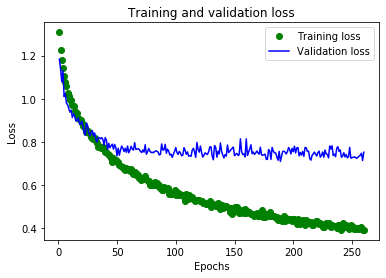

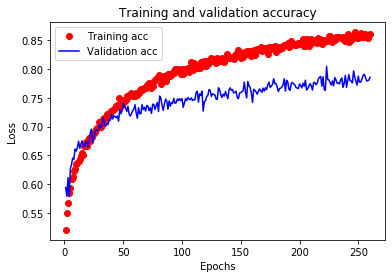

In [12]:
model.plot()

In [13]:
model.evaluate(X_test,y_test)

1534/1534 [==============================] - 0s 88us/step
Modes Accuracy is:  0.7855280041694641


## Predictions

In [14]:
model_cnn_imp = load_model('Final_Model_new.h5')

In [15]:
Emotions = ['Anger','Fear','Surprised','Sad','Happy','Disgust','Neutral']

def split(filepath):
    sound = AudioSegment.from_wav(filepath)
    dBFS = sound.dBFS
    chunks = split_on_silence(sound, 
        min_silence_len = 500,
        silence_thresh = dBFS-16,
        keep_silence = 250)
    return chunks

def get_mfcc(x_wav, num_features = 100):
    y, sr = librosa.load(x_wav)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_features).T,axis=0)
    return mfccs

def decode(datum):
    res = np.argmax(datum,axis = 1)
    p1 = int(mode(res[0::2])[0][0])
    p2 = int(mode(res[1::2])[0][0])
    p1_pred = Emotions[p1]
    p2_pred = Emotions[p2]
    return p1_pred, p2_pred

### Enter file path of wav file below 

In [16]:
path = 'E:/Hackathon_Data/English/RID36_P184671_TMI_PTM_6184671_07162019_091305_000158_0.wav'

In [17]:
ch = split(path)
for i, chunk in enumerate(ch):
    chunk.export(
        "_Temp_files_2/chunk{0}.wav".format(i),
        bitrate = "192k",
        format = "wav")

In [18]:
Data_for_predictions = []

for filename in os.listdir('_Temp_files_2'):
    Data_for_predictions.append(get_mfcc('_Temp_files_2/' + filename))
    
Data_for_predictions = np.array(Data_for_predictions)

for filename in os.listdir('_Temp_files_2'):
    os.remove('_Temp_files_2/' + filename)

In [19]:
preds = model_cnn_imp.predict(np.expand_dims(Data_for_predictions,-1))

In [20]:
result = decode(preds)
print('Person 1 : ',result[0], '\nPerson 2 : ',result[1])

Person 1 :  Neutral 
Person 2 :  Neutral
